### Edgar Moises Hernandez-Gonzalez
#### Asesores: Pilar Gomez-Gil, Erik Bojorges-Valdez
#### Instituto Nacional de Astrofísica Óptica y Electrónica (INAOE)
#### 11/03/20-24/11/20
#### Tesis: Clasificación de señales EEG basada en representaciones bidimensionales y redes neuronales convolucionales
#### Imagen de espectrograma con STFT de EEG de BCI competition IV dataset 2a

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [ ]:
# importar un canal de una muestra
# la muestra 3 es mano derecha
# canal C3 (canal 8)
# canal C4 (canal 12) (usar este)
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[2, 11000:12000]
# canal = pd.read_csv("Ventaneo-A01T.csv", header=None).iloc[43:64, 5500:6000]

In [ ]:
canal.shape

(1000,)

(1000,)


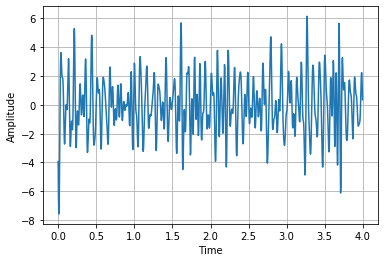

In [ ]:
# 4 segundos con fs=250Hz
fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Espectrograma (STFT)
# senal,
# fs=frecuencia de muestreo,
# window='tipo de ventana',
# nperseg=tamano de ventana,
# noverlap=puntos superpuestos,
# nfft=tamano de la FFT con relleno de ceros, Si=None la longitud de FFT es nperseg
# scaling=‘density’: power spectral density, ‘spectrum’: power spectrum
f, t, Sxx = spectrogram(sig, fs=250, window='hann', nperseg=250, noverlap=225, nfft=500, scaling='spectrum')

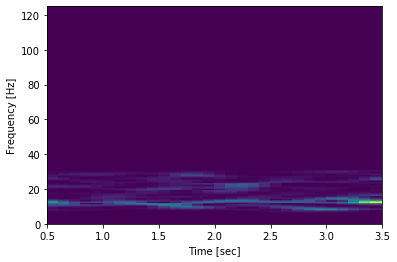

In [ ]:
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [ ]:
# indices de f donde estan las frecuencias 8-30Hz
print(f[16])
print(f[60])

8.0
30.0


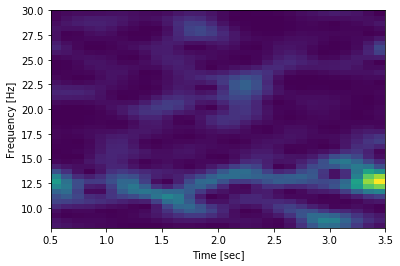

In [ ]:
# Espectrograma (Zoom)
# graficar todo el tiempo y las frecuencias de 8-30Hz
plt.pcolormesh(t, f, Sxx)
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

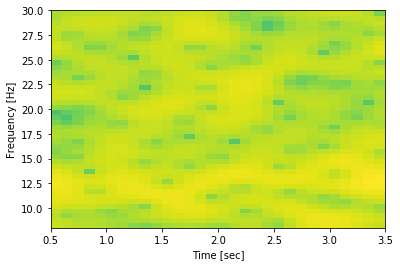

In [ ]:
# esto no se utilizo en la tesis, es un trabajo futuro
# imprimir aplicando ln para resaltar el color
plt.pcolormesh(t, f, np.log(Sxx))
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [ ]:
print("Shape Espectrograma:", Sxx.shape)
print("Valores de f:\n", f[16:61])

Shape Espectrograma: (251, 31)
Valores de f:
 [ 8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30. ]


STFT
(45, 31)


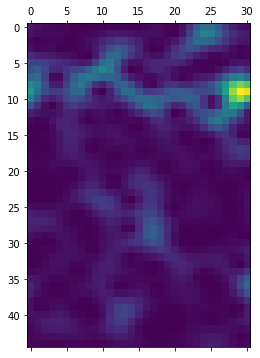

In [ ]:
print("STFT")
x = Sxx[16:61, :]
print(x.shape)
plt.matshow(x)
plt.show()

In [ ]:
# ln de STFT, para resaltar los colores
x_log = np.log(x)

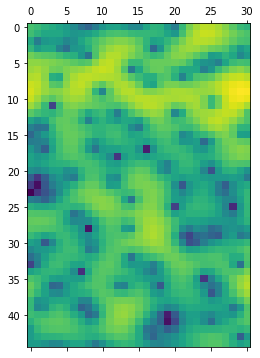

In [ ]:
plt.matshow(x_log)
plt.show()